In [1]:
# !pip install nltk
# !pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn import linear_model, metrics
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import collections

In [3]:
with open('./prepared.pickle', 'rb') as f:
    df = pickle.load(f)
    
with open('./bow_stemmed.pickle', 'rb') as f:
    bow_stemmed_df = pickle.load(f)
    
with open('./bow_lemma.pickle', 'rb') as f:
    bow_lemma_df = pickle.load(f)
        
with open('./tfidf_stemmed.pickle', 'rb') as f:
    tfidf_stemmed_df = pickle.load(f)
    
with open('./tfidf_lemma.pickle', 'rb') as f:
    tfidf_lemma_df = pickle.load(f)

In [4]:
df.shape, bow_stemmed_df.shape, tfidf_stemmed_df.shape

((49159, 8), (49159, 1000), (49159, 1000))

In [5]:
df['label'].value_counts()

0.0    29720
1.0     2242
Name: label, dtype: int64

Данные сильно смещены в сторону label = 0

In [6]:
TOTAL_COUNT = 31962 #дальше NaN в label
TRAIN_COUNT = 25000

def split(df):
    return df[:TRAIN_COUNT], df[TRAIN_COUNT:TOTAL_COUNT]

In [7]:
y_train, y_test = split(df['label'])

In [8]:
y_train.shape, y_test.shape

((25000,), (6962,))

In [9]:
threshold = np.vectorize(lambda x: 1 if float(x) >= 0.3 else 0)

In [10]:
def train_model(classifier, train_x, train_y, valid_x, valid_y):
    classifier.fit(train_x, train_y)
    
    # т.к. не понял, как применить порог для predict_proba списка - сделал просто predict
    #predictions_proba = threshold(classifier.predict_proba(valid_x))
    predictions = classifier.predict(valid_x)
    return metrics.f1_score(predictions, valid_y)

In [11]:
log_reg = linear_model.LogisticRegression(random_state=42)

#### Задание 1, 2

**Вопрос:**  
"Рассчитаем predict_proba, приведем prediction в в бинарный вид: если предсказание >= 0.3 то 1, иначе 0, тип заменим на int"  
predict_proba возвращает массив вероятностей классов - массив. Как его сравнивать с пороговым значением? Если там [0.4, 0.6] и оба > 0.3, то результат 0 или 1?

In [12]:
bow_stemmed_train, bow_stemmed_test = split(bow_stemmed_df)
f1_bow_stem = train_model(log_reg, bow_stemmed_train, y_train, bow_stemmed_test, y_test)

In [13]:
bow_lemma_train, bow_lemma_test = split(bow_lemma_df)
f1_bow_lem = train_model(log_reg, bow_lemma_train, y_train, bow_lemma_test, y_test)

In [14]:
tfidf_stemmed_train, tfidf_stemmed_test = split(tfidf_stemmed_df)
f1_tfidf_stem = train_model(log_reg, tfidf_stemmed_train, y_train, tfidf_stemmed_test, y_test)

In [15]:
tfidf_lemma_train, tfidf_lemma_test = split(tfidf_lemma_df)
f1_tfidf_lemma = train_model(log_reg, tfidf_lemma_train, y_train, tfidf_lemma_test, y_test)

#### Задание 3

In [16]:
f1_bow_stem, f1_bow_lem, f1_tfidf_stem, f1_tfidf_lemma

(0.46372688477951635, 0.46875, 0.44933920704845814, 0.4683357879234168)

Вывод - возможно надо балансировать данные

#### Задания 4-6

In [17]:
def draw_cloud(words):
    counter = collections.Counter(words)
    stopwords_set = set(stopwords.words('english'))
    # draw a Word Cloud with word frequencies
    wordcloud = WordCloud(
        background_color='white',
        max_words=50000,
        stopwords = stopwords_set
       ).generate_from_frequencies(counter)
    plt.figure(figsize=(13,12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [22]:
all_words = []
for line in df['tweet_lemmatized']: 
    all_words.extend(line)
    
pos_words = []
for line in df['tweet_lemmatized'][df['label']==0]: 
    pos_words.extend(line)
    
neg_words = []
for line in df['tweet_lemmatized'][df['label']==1]: 
    neg_words.extend(line)

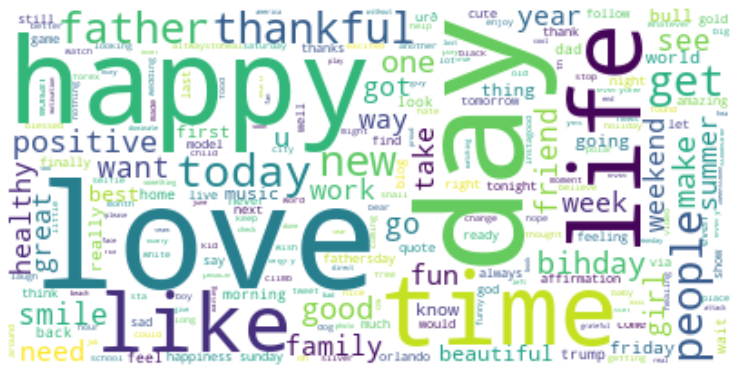

In [23]:
draw_cloud(all_words)

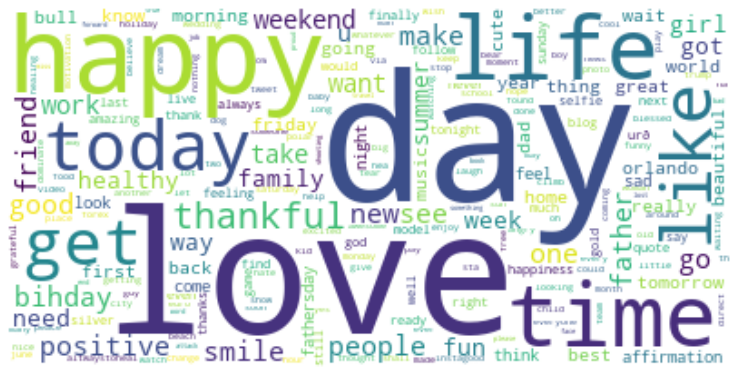

In [24]:
draw_cloud(pos_words)

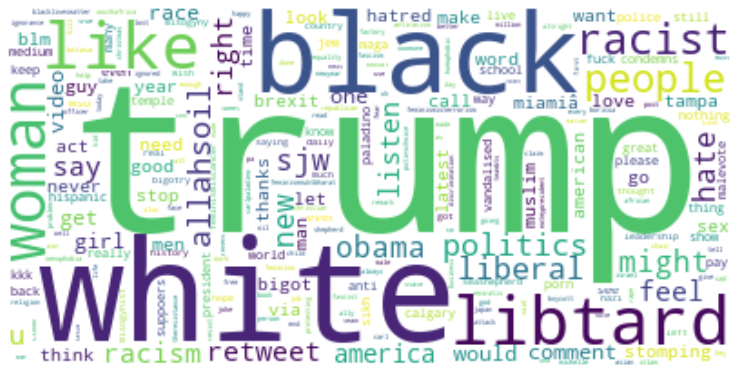

In [25]:
draw_cloud(neg_words)